In [29]:
!pip install importlib.resources
from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt
import os.path as path
import wget
    

In [1]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat"


In [2]:
def reader(url):
    if not path.exists(url):
        Path_ = wget.download(url)
    else:
        Path_ = url
    
    df=np.loadtxt(Path_)
    return df

In [32]:
datos_manchas =reader(url)


In [33]:
fechas = datos_manchas[:,0] + datos_manchas[:,1]/12
manchas_solares = datos_manchas[:,3]

In [34]:
filtro = fechas > 1900

In [35]:
promedio = np.mean(manchas_solares[filtro])
manchas_solares = manchas_solares[filtro] - promedio
fechas = fechas[filtro]

In [36]:
N = len(manchas_solares)
fft = np.fft.fft(manchas_solares)
Freqs = np.fft.fftfreq(N,1)
ffta = np.abs(fft)


In [37]:
mask = Freqs<0
FFT = fft.copy()
FFT[mask] = 0
FFTA = np.abs(FFT)

In [38]:
#Encontrar la frecuencia dominante
indice_mayor = np.argmax(FFTA)
f0 = Freqs[indice_mayor]
T = (1/f0)/12

In [39]:
#eliminar frecuencias mayores y frecuencias menores
indices_izquierda = np.abs(Freqs) > f0
indices_derecha = np.abs(Freqs) < f0
fft[indices_izquierda] = 0
fft[indices_derecha] = 0
ffta = np.abs(fft)

In [43]:
#Obtencion de la figura para frecuencia dominante
manchas_fft = np.fft.ifft(fft)

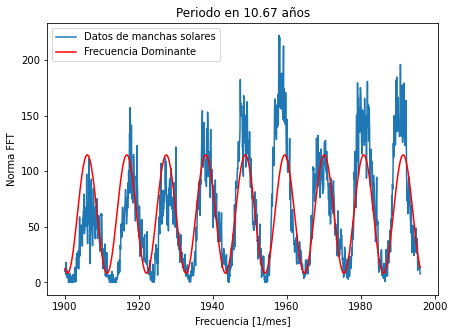

In [44]:
fig = plt.figure(figsize=(7,5))
plt.subplot(1,1,1)
plt.title(f"Periodo en {round(T,2)} años")
plt.plot(fechas,manchas_solares+promedio, label = "Datos de manchas solares")
plt.plot(fechas,np.real(manchas_fft)+promedio, color = "red" , label = "Frecuencia Dominante")

plt.xlabel("Frecuencia [1/mes]")
plt.ylabel("Norma FFT")
plt.legend()
plt.savefig("PeriodoManchasSolares.pdf")